In [9]:
import tensorflow as tf
x = tf.constant(2.0)

def f(x):
    return x * x

with tf.GradientTape() as g:
    g.watch(x)
    y = f(x)

dy_dx = g.gradient(y, x) # Will compute to 6.0
print(dy_dx)

tf.Tensor(4.0, shape=(), dtype=float32)


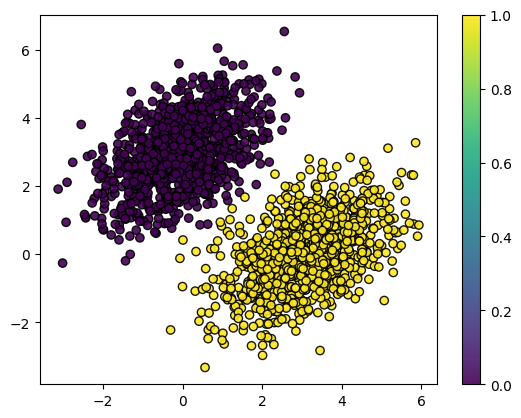

In [22]:
import numpy as np
import matplotlib.pyplot as plt

cov = [[1, 0.5], [0.5, 1]]
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=cov, size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=cov, size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                      np.ones((num_samples_per_class, 1), dtype='float32')))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0], alpha=0.9, edgecolors='black')
plt.colorbar()
plt.show()

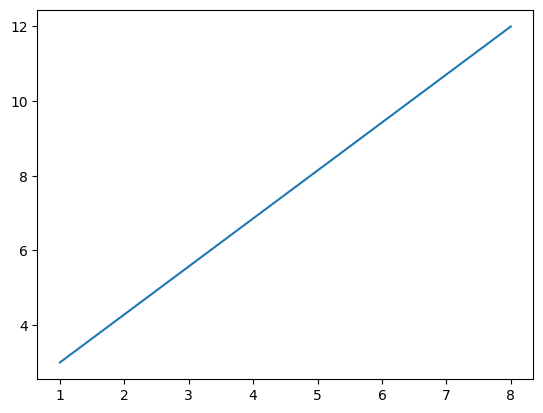

In [24]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([1, 8])
ypoints = np.array([3, 12])

plt.plot(xpoints, ypoints)
plt.show()

In [2]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
    g.watch(x)
    with tf.GradientTape() as gg:
        gg.watch(x)
        y = x * x
    dy_dx = gg.gradient(y, x)     # Will compute to 10.0
d2y_dx2 = g.gradient(dy_dx, x)  # Will compute to 2.0
print(dy_dx)

tf.Tensor(10.0, shape=(), dtype=float32)


In [3]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    y = x * x
    z = y * y
dy_dx = g.gradient(y, x)  # Will compute to 6.0
print(dy_dx)

dz_dx = g.gradient(z, x)  # Will compute to 108.0
print(dz_dx)

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(108.0, shape=(), dtype=float32)


In [25]:
import pandas as pd
djia_data = pd.read_csv('HistoricalPrices.csv')
djia_data.head()

,Date,Open,High,Low,Close
0,10/06/23,33040.70,33557.69,32846.94,33407.58
1,10/05/23,33099.23,33174.38,32941.56,33119.57
2,10/04/23,33034.18,33156.45,32873.23,33129.55
3,10/03/23,33318.84,33398.54,32916.20,33002.38
4,10/02/23,33455.50,33511.91,33219.56,33433.35


In [29]:
djia_data = djia_data.rename(columns = {' Open': 'pen', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})
djia_data.head()

,Date,Open,High,Low,Close
0,10/06/23,33040.70,33557.69,32846.94,33407.58
1,10/05/23,33099.23,33174.38,32941.56,33119.57
2,10/04/23,33034.18,33156.45,32873.23,33129.55
3,10/03/23,33318.84,33398.54,32916.20,33002.38
4,10/02/23,33455.50,33511.91,33219.56,33433.35


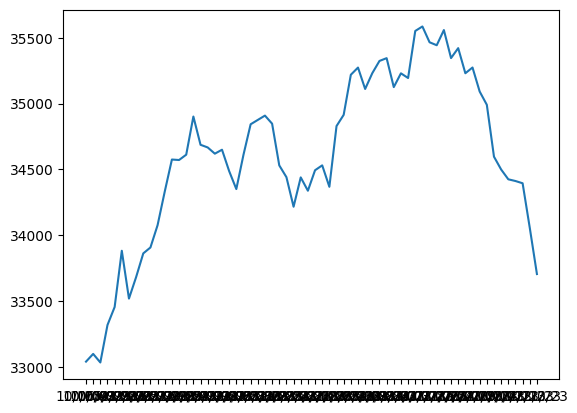

In [34]:
plt.plot(djia_data['Date'], djia_data['Open'])
plt.show()

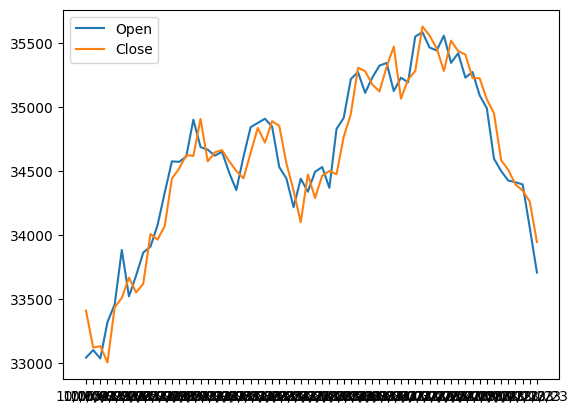

In [37]:
plt.plot(djia_data['Date'], djia_data['Open'], label='Open')
plt.plot(djia_data['Date'], djia_data['Close'], label='Close')
plt.legend()
plt.show()

In [ ]:
from calendar import month_name

djia_data['Month'] = pd.Categorical(djia_data['Month'], categories=month_name[1:], ordered=True)